<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial102_DL_terminology_training_testing_validation_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/XmqzYnkCIs4

**Understanding deep learning terminology**

This code can be used to explain training, testing, and validation data

A rule of thumb:

- Split data into training / validation and import new data for testing.
- If new data for testing is not available, separate test data from main dataset. Do not use this for validation (during training)
- Start with 75/25 split for train/validation
- Use data augmentation for small datasets but do not augment a lot as the model does not get any better. 





**cifar10 dataset**

60,000 32×32 pixel images divided into 10 classes.

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.style.use('classic')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop



In [ ]:
#Let us extract only the 50000 training data available from cifar for this exercise.  
(X, Y), (_, _) = cifar10.load_data()
print("The size of dataset X is: ", X.shape)  #Images
print("The size of dataset Y is: ", Y.shape)  #Corresponding labels

170500096/170498071 [==============================] - 2s 0us/step
The size of dataset X is:  (50000, 32, 32, 3)
The size of dataset Y is:  (50000, 1)


Let us ignore the fact that we have test data available since this may be the case in real life. You may have one dataset that you need to work with. 

Therefore, let us only with the 50000 training images to understand training, validation and testing data. 

In [ ]:
#Holding out 10% of all data to be used for testing purposes. 
#This data will never see the training. 
from sklearn.model_selection import train_test_split

X1, X_test, Y1, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
print("The size of the test dataset is: ", X_test.shape)
print("The size of the remaining dataset is : ", X1.shape)

The size of the test dataset is:  (5000, 32, 32, 3)
The size of the remaining dataset is :  (45000, 32, 32, 3)


Now, split the remaining data into training and validation data. 

Remember that validation data is used to verify the accuracy of the training after each epoch. It will not influence the training process itself. Also remember that training accuracy is checked after each batch while validation accuracy is checked only after a full epoch. 

In [ ]:
#Split again into train and test to create small training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)
print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_valid.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_valid.shape)

The size of training dataset is:  (33750, 32, 32, 3)
The size of testing dataset is:  (11250, 32, 32, 3)
The size of training dataset y is:  (33750, 1)
The size of testing dataset y is:  (11250, 1)


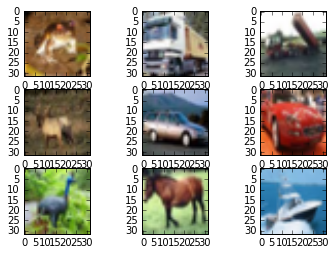

In [ ]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [ ]:
X_train = (X_train.astype('float32')) / 255.
X_valid = (X_valid.astype('float32')) / 255.
X_test = (X_test.astype('float32')) / 255.


In [ ]:
# Print a few y_train values to see before and after categorical
print(y_train[0])
print(y_train[1])
print(y_train[10])

[6]
[9]
[4]


In [ ]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[0])
print(y_train[1])
print(y_train[10])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Create a model with dropout
drop=0.25
kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = RMSprop(lr=0.001, decay=1e-6)
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
#########################################################
#Fit model....
history = model1.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_valid, y_valid), verbose=1)


Epoch 1/25
528/528 [==============================] - 37s 9ms/step - loss: 2.2265 - accuracy: 0.1920 - val_loss: 1.7799 - val_accuracy: 0.3573
Epoch 2/25
528/528 [==============================] - 4s 8ms/step - loss: 1.7030 - accuracy: 0.3764 - val_loss: 1.5315 - val_accuracy: 0.4451
Epoch 3/25
528/528 [==============================] - 4s 8ms/step - loss: 1.5660 - accuracy: 0.4295 - val_loss: 1.4727 - val_accuracy: 0.4700
Epoch 4/25
528/528 [==============================] - 4s 8ms/step - loss: 1.4575 - accuracy: 0.4710 - val_loss: 1.3496 - val_accuracy: 0.5166
Epoch 5/25
528/528 [==============================] - 4s 8ms/step - loss: 1.3744 - accuracy: 0.5042 - val_loss: 1.2834 - val_accuracy: 0.5414
Epoch 6/25
528/528 [==============================] - 4s 8ms/step - loss: 1.3166 - accuracy: 0.5224 - val_loss: 1.2460 - val_accuracy: 0.5593
Epoch 7/25
528/528 [==============================] - 4s 8ms/step - loss: 1.2601 - accuracy: 0.5503 - val_loss: 1.1714 - val_accuracy: 0.5859
Epoch

In [ ]:
#Evaluate the model against test data that never saw the training process. 
_, test_acc = model1.evaluate(X_test, y_test)
_, valid_acc = model1.evaluate(X_valid, y_valid)
print("Accuracy on the validation dataset = ", (valid_acc * 100.0), "%")
print("Accuracy on the test dataset = ", (test_acc * 100.0), "%")


157/157 [==============================] - 1s 4ms/step - loss: 0.7850 - accuracy: 0.7194
Accuracy on the test dataset =  71.93999886512756 %
352/352 [==============================] - 1s 3ms/step - loss: 0.7793 - accuracy: 0.7274
Accuracy on the validation dataset =  72.73777723312378 %


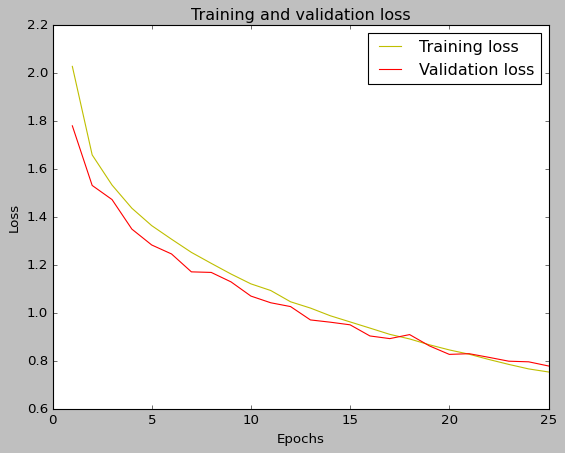

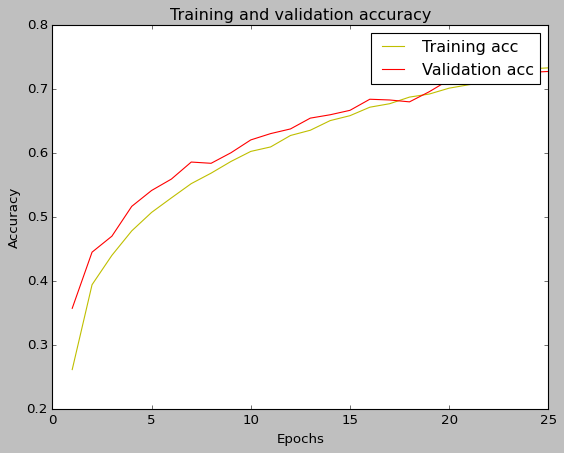

In [ ]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the Test set results
y_pred_test = model1.predict(X_test)
prediction_test = np.argmax(y_pred_test, axis=1)
ground_truth = np.argmax(y_test, axis=1)

(5000,)


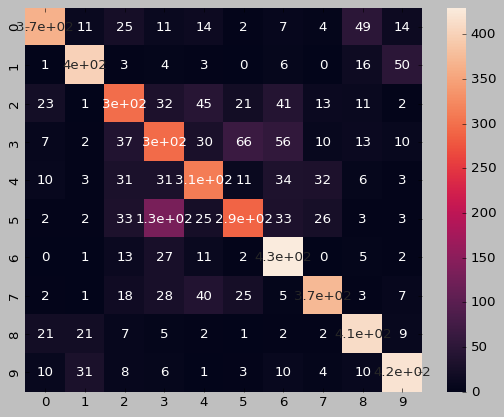

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ground_truth, prediction_test)

sns.heatmap(cm, annot=True)